In [1]:
from IPython.core.display import HTML
display(HTML(''))

%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns


SEED = 42
rng = np.random.default_rng(SEED)

## Setup

In [3]:
def championship(K):
    """Uniform sampling over K alternatives by running a Bernoulli championship.
    """
    competitors = {k for k in range(K)}
    count = 0
    while len(competitors) > 1:
        scores = rng.binomial(1, 0.5, size=len(competitors))
        count += len(competitors)  # Number of coin tosses
        if all(scores) != any(scores):  # Not all scores are 1, nor are all scores 0
            competitors = {k for i, k in enumerate(competitors) if scores[i]}  # Keep only the winners
    return list(competitors)[0], count

## Simulation with K=3

In [4]:
K = 3
M = int(1e6)
data = np.array([championship(K) for _ in tqdm(range(M))])
samples = np.array(data)[:, 0]
counts = np.array(data)[:, 1]

  0%|          | 0/1000000 [00:00<?, ?it/s]

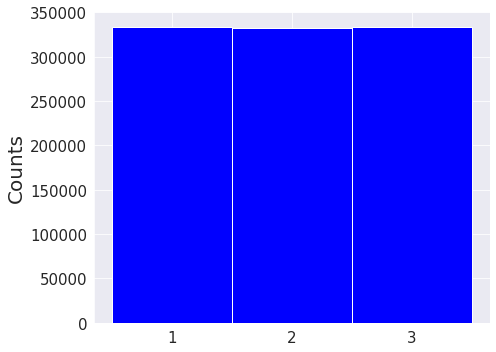

In [5]:
with sns.axes_style('darkgrid'):
    fig, ax = plt.subplots(figsize=(7, 5), nrows=1, ncols=1)

    ax.hist(samples, bins=np.linspace(0, K, K + 1), color='b')
    ax.set_xticks(np.linspace(1, K, K) - 0.5)
    ax.set_xticklabels(np.linspace(1, K, K).astype(int), fontsize=15)
    ax.set_ylabel('Counts', fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=15)
        
    plt.tight_layout()
    plt.show()

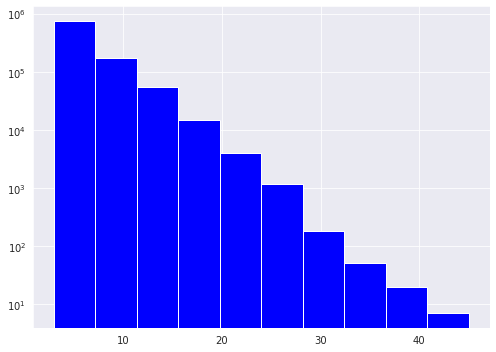

In [6]:
with sns.axes_style('darkgrid'):
    fig, ax = plt.subplots(figsize=(7, 5), nrows=1, ncols=1)

    ax.hist(counts, bins=10, color='b')
    ax.set_yscale('log')
    
    plt.tight_layout()
    plt.show()

## Sampling cost with K

In [7]:
M = int(1e3)
Ks = range(3, 100)
counts = np.empty((len(Ks), M))
for i, K in enumerate(tqdm(Ks)):
    data = np.array([championship(K) for _ in range(M)])
    counts[i] = np.array(data)[:, 1]

  0%|          | 0/97 [00:00<?, ?it/s]

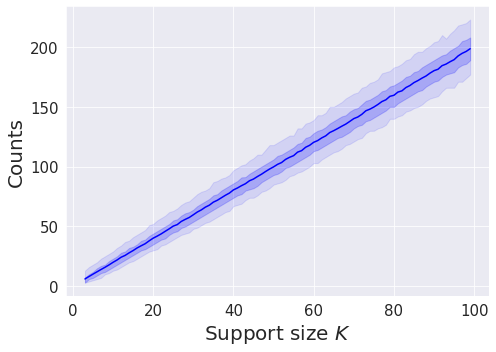

In [8]:
with sns.axes_style('darkgrid'):
    fig, ax = plt.subplots(figsize=(7, 5), nrows=1, ncols=1)

    ax.plot(Ks, np.mean(counts, axis=1), color='blue')
    ax.fill_between(Ks, y1=np.quantile(counts, 0.25, axis=1), y2=np.quantile(counts, 0.75, axis=1), alpha=0.2, color='blue')
    ax.fill_between(Ks, y1=np.quantile(counts, 0.05, axis=1), y2=np.quantile(counts, 0.95, axis=1), alpha=0.1, color='blue')
    
    ax.set_xlabel('Support size $K$', fontsize=20)
    ax.set_ylabel('Counts', fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=15)
    
    plt.tight_layout()
    plt.show()